# Analysis of changes in nightly lows at Rochester, NY over last 73 years

### Everyone is aware of global worming caused by the increased CO2 content and CH4 content in our atmosphere, the former being caused by the combustion of fossile fuels and the latter being caused by thawing of tundra and gas flares. It is also well known that the international community strives to limit global warming by about 1.5 fahrenheit degrees. Nevertheless, authorities say we may have reached this 1.5 fahrenheit degree increase.

### This project explores the data for Rochester NY, specifically at the Monroe County Airport (aka ROC) and examines what patterns can be formed, and determine whether global warming shows up more in the data of winter lows, summer highs, certain months of the year and how it shows up in extreme and cold months.

l
### The data was imported from the National Centers for Environmental Information of NOAA (i.e. the National Weather Service)

## After downloading data to my local PC, I now read it in and inspect it. Notice that only the date and the minimum temperatures in Fahrenheit are read in

In [80]:
import pandas as pd
# Program to extract number
# of rows using Python
#import xlrd
 
# Give the location of the file
#loc = ("C:\Users\user\Downloads\rocmintemp1a.csv")
df = pd.read_csv('C:\\Users\\Matthew\\Desktop\\datasets\\Rocminds1a\\rocmaster1b.csv')
print(df.head())
print('ldlsl')


       STATION                                    NAME      DATE  TAVG  TMAX  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/01/48   NaN    28   
1  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/02/48   NaN    28   
2  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/03/48   NaN    30   
3  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/04/48   NaN    29   
4  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/05/48   NaN    29   

   TMIN  Unnamed: 6  
0    22         NaN  
1    24         NaN  
2    22         NaN  
3    23         NaN  
4    21         NaN  
ldlsl


### I now explore the read in data

In [81]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27088 entries, 0 to 27087
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATION     27088 non-null  object 
 1   NAME        27088 non-null  object 
 2   DATE        27088 non-null  object 
 3   TAVG        5839 non-null   float64
 4   TMAX        27088 non-null  int64  
 5   TMIN        27088 non-null  int64  
 6   Unnamed: 6  1 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.4+ MB
None


### do note that the date column is object type. This will have to be converted to datetime

In [82]:
print(df.shape)

(27088, 7)


In [83]:
print(df.describe())

              TAVG          TMAX          TMIN  Unnamed: 6
count  5839.000000  27088.000000  27088.000000         1.0
mean     49.515670     57.543783     39.360344         0.0
std      18.636754     20.574022     17.645540         NaN
min      -3.000000     -4.000000    -19.000000         0.0
25%      35.000000     40.000000     27.000000         0.0
50%      51.000000     59.000000     40.000000         0.0
75%      66.000000     76.000000     54.000000         0.0
max      85.000000    100.000000     78.000000         0.0


In [84]:
print(df)

           STATION                                    NAME      DATE  TAVG  \
0      USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/01/48   NaN   
1      USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/02/48   NaN   
2      USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/03/48   NaN   
3      USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/04/48   NaN   
4      USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/05/48   NaN   
...            ...                                     ...       ...   ...   
27083  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  02/24/22  19.0   
27084  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  02/25/22  20.0   
27085  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  02/26/22  21.0   
27086  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  02/27/22  28.0   
27087  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  02/28/22  20.0   

       TMAX  TMIN  Unnamed: 6  
0        28    22         NaN  

In [85]:
df2 = df
df2['DATE'] = pd.to_datetime(df['DATE'])
print(df2.shape)
print(df2.head(90))

(27088, 7)
        STATION                                    NAME       DATE  TAVG  \
0   USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-01-01   NaN   
1   USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-01-02   NaN   
2   USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-01-03   NaN   
3   USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-01-04   NaN   
4   USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-01-05   NaN   
..          ...                                     ...        ...   ...   
85  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-03-26   NaN   
86  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-03-27   NaN   
87  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-03-28   NaN   
88  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-03-29   NaN   
89  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2048-03-30   NaN   

    TMAX  TMIN  Unnamed: 6  
0     28    22         NaN  
1     28    24    

### dates from last century are characterized in this centrury with a cut off of 1969.  I will have to compensate for that now

In [86]:
date_separator = pd.to_datetime("20250101")
century = pd.DateOffset(years=100)
before_separator = df2['DATE'] > date_separator
df2.loc[before_separator , 'DATE'] = df2['DATE'] - century
print(df2.head())

       STATION                                    NAME       DATE  TAVG  TMAX  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-01   NaN    28   
1  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-02   NaN    28   
2  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-03   NaN    30   
3  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-04   NaN    29   
4  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-05   NaN    29   

   TMIN  Unnamed: 6  
0    22         NaN  
1    24         NaN  
2    22         NaN  
3    23         NaN  
4    21         NaN  


In [87]:
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
print(df2.head())
print(df2.tail())

       STATION                                    NAME       DATE  TAVG  TMAX  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-01   NaN    28   
1  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-02   NaN    28   
2  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-03   NaN    30   
3  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-04   NaN    29   
4  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-05   NaN    29   

   TMIN  Unnamed: 6  year  month  
0    22         NaN  1948      1  
1    24         NaN  1948      1  
2    22         NaN  1948      1  
3    23         NaN  1948      1  
4    21         NaN  1948      1  
           STATION                                    NAME       DATE  TAVG  \
27083  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02-24  19.0   
27084  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02-25  20.0   
27085  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02

### The analysis of the data begins. First, I will see how the average of the daily mean changed over the 77 years to get an idea of the overall temp increase, and then I will plot the annual mean of the daily highs and daily lows to see which one had the greatest increase in temperature

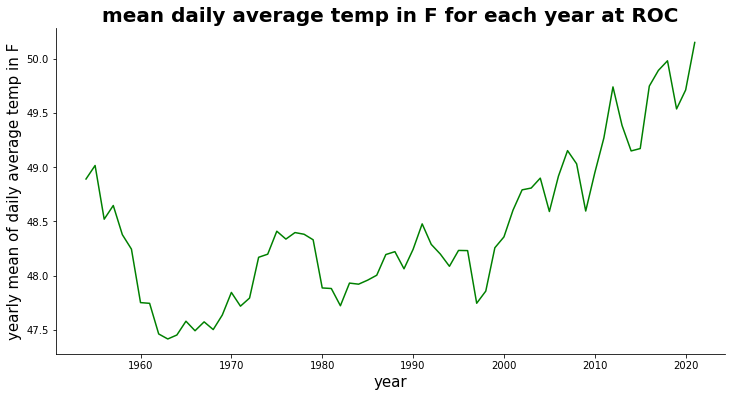

In [88]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1947) & (df2['year'] < 2022)]
dfext = (dffull.groupby(['year'])['TMAX'].mean() + dffull.groupby(['year'])['TMIN'].mean())/2.0
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean(), c='green')
ax.set_ylabel ('yearly mean of daily average temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily average temp in F for each year at ROC", size=20, weight='bold')
plt.show()

### It appears that temperatures overall increased by about 2.0 Fahrenheit degrees at ROC from the end of WW II to today, suggesting that Rochester NY may be approaching the 2015 Paris Agreement limit of 2.7 Fahrenheit degrees.

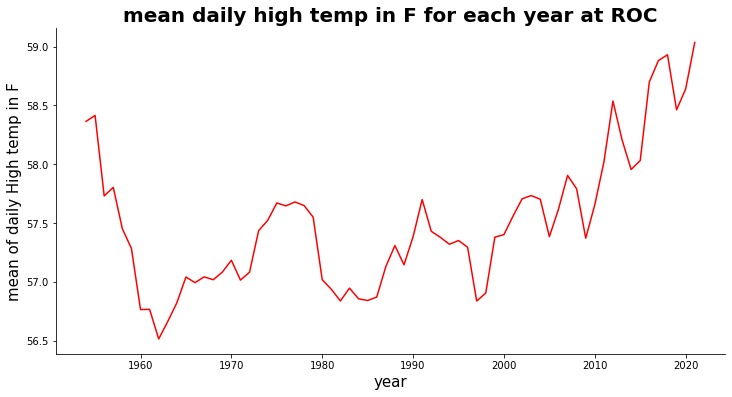

In [89]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1947) & (df2['year'] < 2022)]
dfext = dffull.groupby(['year'])['TMAX'].mean()
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean(), c='red')
ax.set_ylabel ('mean of daily High temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily high temp in F for each year at ROC", size=20, weight='bold')
plt.show()

### daily highs seemed to increas only about 1.5 Fahrenheit degrees in this period

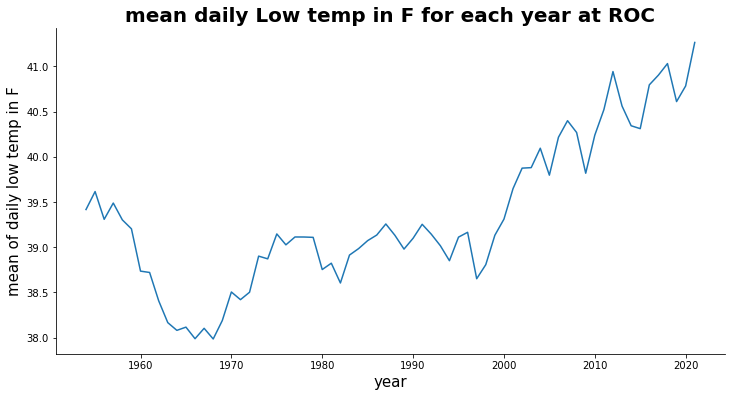

In [90]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1947) & (df2['year'] < 2022)]
dfext = dffull.groupby(['year'])['TMIN'].mean()
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean())
ax.set_ylabel ('mean of daily low temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily Low temp in F for each year at ROC", size=20, weight='bold')
plt.show()

### however daily lows seemed to hav increased about 2 Fahrenheit degrees over this 77 year period, suggesting that an outsized proportion of the global warming is reflected in the daily minimum temperatures

### With that, I will now focus on the coldest months of the year for df3, that being Dec thru Feb. This presents a small problem because December is of a different year than Jan and Feb. I'll remedy this issue by adding a new column called 'season' to allow for December to be grouped in the same season as Jan and Feb of the next calendar year

### After forming month and year columns derived from the date column, we will now focus on the coldest months of the year (Dec to March) and store in df3 

In [91]:
df3 = df2.loc[(df2['month'] == 12) | (df2['month'] < 3)]
pd.options.mode.chained_assignment = None  # default='warn'
df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] <= 2 else f"{x['year']}/{x['year']+1}", axis=1)
print(df3.head())
print(df3.tail())

       STATION                                    NAME       DATE  TAVG  TMAX  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-01   NaN    28   
1  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-02   NaN    28   
2  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-03   NaN    30   
3  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-04   NaN    29   
4  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-05   NaN    29   

   TMIN  Unnamed: 6  year  month     season  
0    22         NaN  1948      1  1947/1948  
1    24         NaN  1948      1  1947/1948  
2    22         NaN  1948      1  1947/1948  
3    23         NaN  1948      1  1947/1948  
4    21         NaN  1948      1  1947/1948  
           STATION                                    NAME       DATE  TAVG  \
27083  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02-24  19.0   
27084  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02-25  20.0   


In [92]:
meeny = df3.groupby(['season'])['TMIN'].mean()
#first winter 1947-48 incomplete data so it is dropped
meeny = meeny[1:]
print(meeny)
print(type(meeny))

season
1948/1949    23.066667
1949/1950    22.088889
1950/1951    19.188889
1951/1952    21.439560
1952/1953    25.022222
               ...    
2017/2018    20.666667
2018/2019    21.511111
2019/2020    23.824176
2020/2021    22.655556
2021/2022    19.244444
Name: TMIN, Length: 74, dtype: float64
<class 'pandas.core.series.Series'>


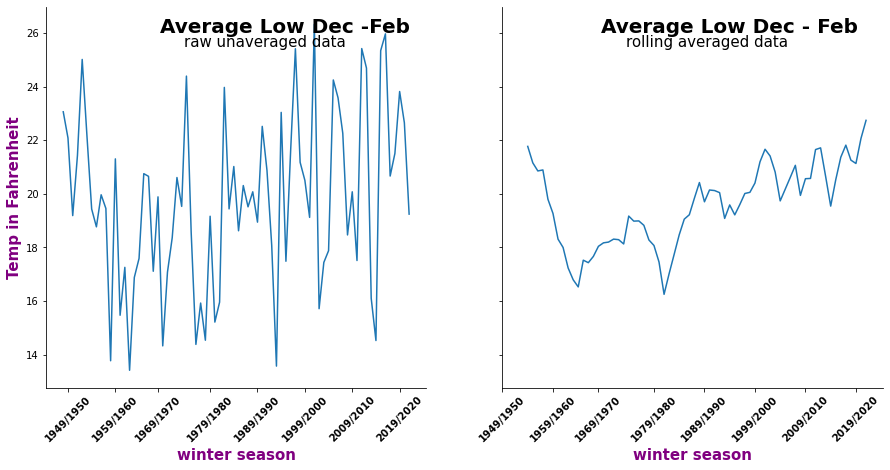

In [93]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(meeny.index, meeny)
ax[1].plot(meeny.index, meeny.rolling(7).mean())

ax[0].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[0].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[0].set_yticks([28, 30, 32, 34, 36])
#ax[0].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[0].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Temp in Fahrenheit', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[1].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[1].set_yticks([28, 30, 32, 34, 36])
#ax[1].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[1].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].text(x=20.5, y=26, s='Average Low Dec -Feb',
        size=20, weight='bold')
ax[0].text(x=25.5, y=25.5, s='raw unaveraged data',
        size=15)
ax[1].text(x=20.5, y=26, s='Average Low Dec - Feb',
        size=20, weight='bold')
ax[1].text(x=25.5, y=25.5, s='rolling averaged data',
        size=15)
plt.show()

### There seems to be a wide variance in the average winter seasonal daily low temperature making it difficult to determine how much of an increase it had over the 77 year period. Even after applying a 7 year rolling average as in the above right graph, it is difficult to determine the increase of winter nightly average lows over the 77 year period.  A steady upward trend seems to be in place

### Now, I will focus on the number of nightly lows each season that dropped below a certain threshold. I played around and it seamed that a threshold of 10F gave significant data

In [94]:
below10 = df3.groupby('season')['TMIN'].apply(lambda x: x[x < 10.0].count())
dffull2 = df2[(df2['year'] > 1945) & (df2['year'] < 2022)]
above90 = dffull2.groupby('year')['TMAX'].apply(lambda x: x[x > 90.0].count())

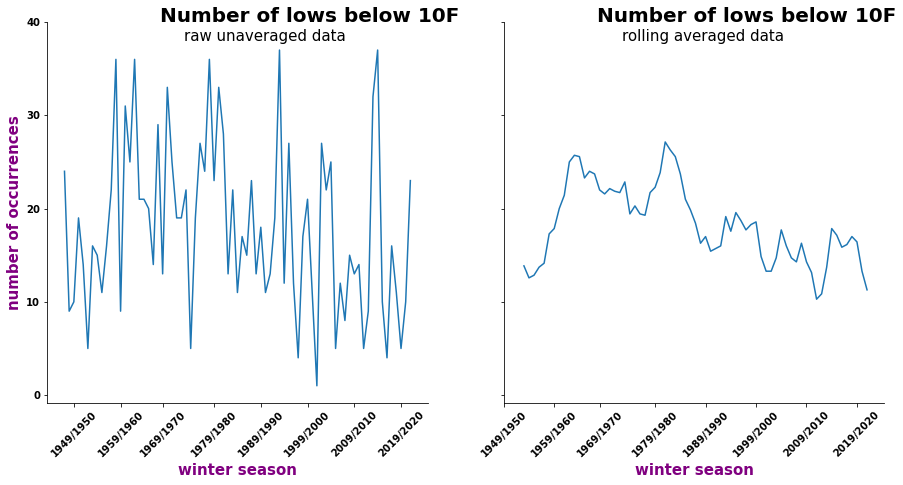

In [95]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(below10.index, below10)
ax[1].plot(below10.index, below10.rolling(7).mean())

ax[0].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[0].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
ax[0].set_yticks([0, 10, 20, 30, 40])
ax[0].set_yticklabels([0, 10, 20, 30, 40], weight = 'bold')
ax[0].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[1].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
ax[1].set_yticks([0, 10, 20, 30, 40])
ax[1].set_yticklabels([0, 10, 20, 30, 40], weight = 'bold')
ax[1].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].text(x=20.5, y=40, s='Number of lows below 10F',
        size=20, weight='bold')
ax[0].text(x=25.5, y=38, s='raw unaveraged data',
        size=15)
ax[1].text(x=20.5, y=40, s='Number of lows below 10F',
        size=20, weight='bold')
ax[1].text(x=25.5, y=38, s='rolling averaged data',
        size=15)
plt.show()

### data and graphs above seemed to show a steady drop in the occurrences of winter nightly lows well below the norm. Due the the high fluctuation, a rolling mean is appied to the right graph to try to clarify the results.

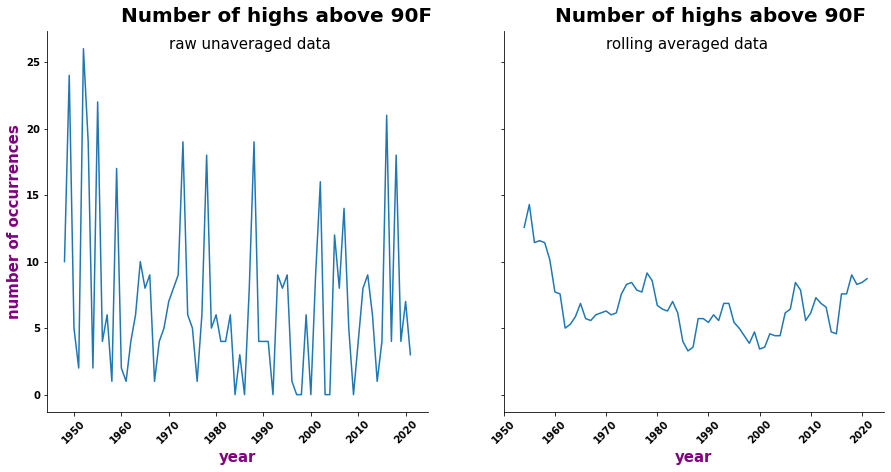

In [96]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(above90.index, above90)
ax[1].plot(above90.index, above90.rolling(7).mean())

ax[0].set_xticks([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax[0].set_xticklabels([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], rotation = 45, weight = 'bold')
ax[0].set_yticks([0, 5, 10, 15, 20, 25])
ax[0].set_yticklabels([0, 5, 10, 15, 20, 25], weight = 'bold')
ax[0].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)



ax[1].set_xticks([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax[1].set_xticklabels([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], rotation = 45, weight = 'bold')
ax[1].set_yticks([0, 5, 10, 15, 20, 25])
ax[1].set_yticklabels([0, 5, 10, 15, 20, 25], weight = 'bold')
ax[1].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].text(x=1960, y=28, s='Number of highs above 90F',
        size=20, weight='bold')
ax[0].text(x=1970, y=26, s='raw unaveraged data',
        size=15)
ax[1].text(x=1960, y=28, s='Number of highs above 90F',
        size=20, weight='bold')
ax[1].text(x=1970, y=26, s='rolling averaged data',
        size=15)

plt.show()

### As can be seen above, the number of daily highs exceeding 90F has not increased and may have decreased over the last 77 years, indicating that data for the warmer months and hot temperatues in Rochester do not show the 2F degree increase we previously saw

### now I will calculate and plot the average nightly lows for each year for the coldest month of the year (January) and the warmest month of the year (July) to see how they compare

In [97]:
jandat = df2[df2['month'] == 1]
#print(janmin)
dfjanminmean = jandat.groupby(['year'])['TMIN'].mean()
print (dfjanminmean)

year
1948    11.193548
1949    23.548387
1950    24.483871
1951    20.064516
1952    20.032258
          ...    
2018    16.903226
2019    16.322581
2020    24.322581
2021    23.161290
2022    10.548387
Name: TMIN, Length: 75, dtype: float64


In [98]:
juldat = df2[df2['month'] == 7]
#print(janmin)
dfjulminmean = juldat.groupby(['year'])['TMIN'].mean()
#print (dfjulminmean)

In [99]:
zippo = df3.groupby('season')['TMIN'].apply(lambda x: x[x < 0.0].count())
print(zippo)

season
1947/1948    8
1948/1949    0
1949/1950    1
1950/1951    5
1951/1952    1
            ..
2017/2018    3
2018/2019    4
2019/2020    0
2020/2021    0
2021/2022    7
Name: TMIN, Length: 75, dtype: int64


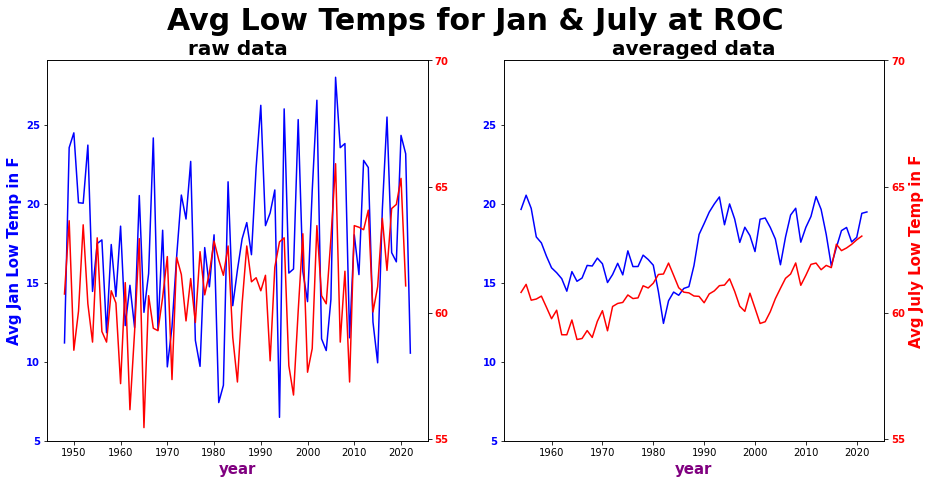

In [100]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].plot(dfjanminmean.index, dfjanminmean, color='blue')

# Create a twin Axes that shares the x-axis
ax2 = np.array([a.twinx() for a in ax.ravel()]).reshape(ax.shape)


# Plot the relative temperature in red
ax2[0].plot(dfjulminmean.index, dfjulminmean,color='red')
# Plot the CO2 variable in blue
ax[1].plot(dfjanminmean.index, dfjanminmean.rolling(7).mean(), color='blue')

ax[0].set_yticks([5, 10, 15, 20, 25])
ax[0].set_yticklabels([5, 10, 15, 20, 25], weight = 'bold', c = 'blue')
ax2[0].set_yticks([55, 60, 65, 70])
ax2[0].set_yticklabels([55, 60, 65, 70], weight = 'bold', c = 'red')
ax[0].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Avg Jan Low Temp in F', c = 'blue', size = 15, weight = 'bold')
ax2[1].set_ylabel ('Avg July Low Temp in F', c = 'red', size = 15, weight = 'bold')

ax2[1].plot(dfjulminmean.index, dfjulminmean.rolling(7).mean(),color='red')
ax2[0].get_shared_y_axes().join(ax2[0], ax2[1])
ax[0].get_shared_y_axes().join(ax[0], ax[1])


ax[1].set_yticks([5, 10, 15, 20, 25])
ax[1].set_yticklabels([5, 10, 15, 20, 25], weight = 'bold', c = 'blue')
ax2[1].set_yticks([55, 60, 65, 70])
ax2[1].set_yticklabels([55, 60, 65, 70], weight = 'bold', c = 'red')
ax[1].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')

ax[0].set_title("raw data", size=20, weight='bold')
ax[1].set_title("averaged data", size=20, weight='bold')

ax[0].text(x=1970, y=31, s='Avg Low Temps for Jan & July at ROC', size=30, weight='bold')


plt.show()

### Suprisingly, it appears that the average nightly lows for July have increased over the 73 year period as compared to the average nightly lows for January. 

### I will now plot the average low for each month and the average high for each month for each year for the 1948 to 2022 time frame. I will then use Seaborn's FacetGrid function to make a grid plot of these 24 graphs (12 months * min and max variants). This will involve a groupby call for each of Min and Max temps, a merging of these two dataframes, and the use of the FacetGrid function to make the 24 plots. Before merging, column names for TMAX and TMIX will each become 'temp', a flag column 'attr' will be formed that tells whether the temperature listed in the temp column is a high or a low temp.


In [101]:
#min data frame is formed
dfmonmin = df2.groupby(['year', 'month'])['TMIN'].mean()
dflow = dfmonmin.reset_index()
dflow['attr'] = 'mintemp'
dflow.rename(columns = {'TMIN': 'temp'}, inplace = True)
print(dflow.head())

   year  month       temp     attr
0  1948      1  11.193548  mintemp
1  1948      2  13.103448  mintemp
2  1948      3  23.612903  mintemp
3  1948      4  38.466667  mintemp
4  1948      5  43.387097  mintemp


In [102]:
#max temp data frame is formed
dfmonmax = df2.groupby(['year', 'month'])['TMAX'].mean()
dfhigh = dfmonmax.reset_index()
dfhigh['attr'] = 'maxtemp'
dfhigh.rename(columns = {'TMAX': 'temp'}, inplace = True)
print(dfhigh.head())

   year  month       temp     attr
0  1948      1  25.709677  maxtemp
1  1948      2  33.137931  maxtemp
2  1948      3  44.580645  maxtemp
3  1948      4  59.500000  maxtemp
4  1948      5  63.354839  maxtemp


In [103]:
#merging occurs
import pandas as pd
concat_df = pd.concat([dflow, dfhigh], axis = 0, ignore_index = True)
print(concat_df.tail())

      year  month       temp     attr
1775  2021     10  64.806452  maxtemp
1776  2021     11  48.566667  maxtemp
1777  2021     12  42.806452  maxtemp
1778  2022      1  28.387097  maxtemp
1779  2022      2  35.892857  maxtemp


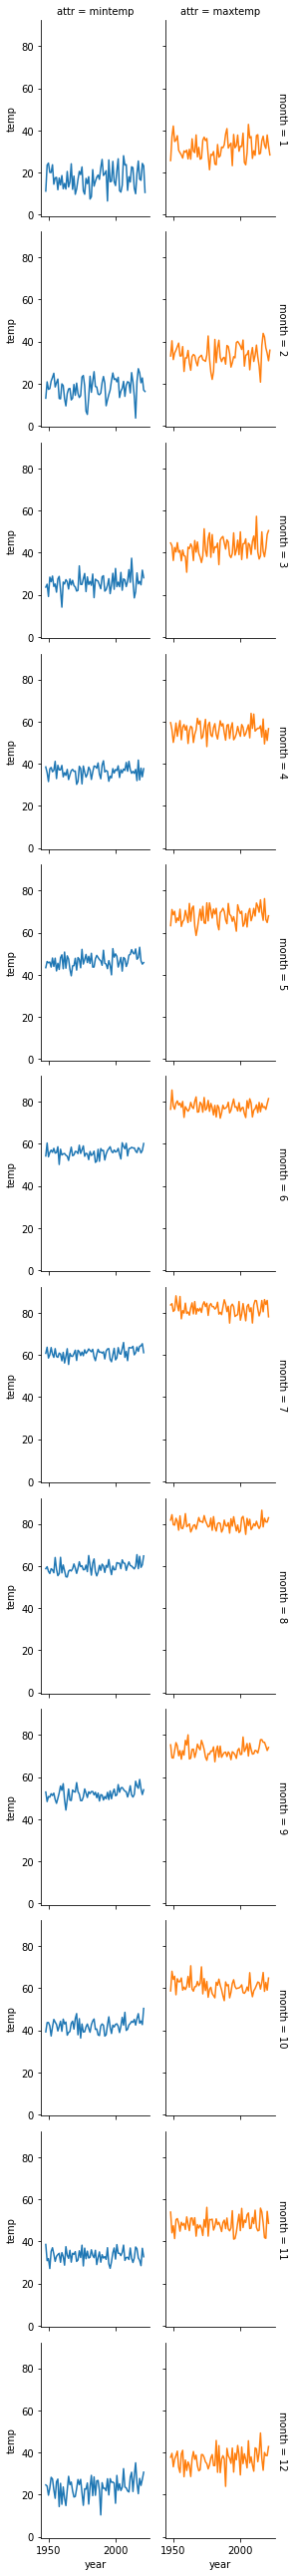

In [104]:
# 24 plots are formed using seaborn's facet search function
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(concat_df, row = 'month', col = 'attr', hue = 'attr', margin_titles = True, aspect = 0.7)
g.map(sns.lineplot, 'year', 'temp')
#plt.set_axis_labels('Year', 'Average Min Temp in F')
plt.show()

### After spanning all 24 combinations (12 months by max or min temps), it seems that tMarch highs and December highs and lows experienced the greatest increase in temperatures over the 73 year period.  March, September and October lows also saw significant increases over the other months for the 73 year window. 

### More striking were the decrease in winder season lows below 10F, and the increase in the seasonal winter lows.  This contrasts from that of Washington DC (my sister project) which seemed to show the greatest increases were in the summer and saw little change in extreme winter lows and winter night temperatures.

